In [274]:
# Allow Python to find our own project modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [275]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# from nltk.tokenize import RegexpTokenizer
# from nltk.stem.snowball import SnowballStemmer

from util import util, cross_validation
# automatic linebreaks and multi-line cells.
pd.set_option('display.max_colwidth', None)

In [276]:
covidlies_clean = pd.read_csv('../data/covid_lies_processed.csv')
# Ensure each row represents a unique tweet by content
df = covidlies_clean.drop_duplicates(['tweet', 'label'])

In [296]:
vectorizer = TfidfVectorizer(stop_words=['coronavirus'])
X = vectorizer.fit_transform(df.tweet)

In [297]:
word_features = vectorizer.get_feature_names()

In [298]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [299]:
words = vectorizer.get_feature_names()

### Top Words by Cluster

In [300]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : first, case, death, coronavirus19, confirm, die, man, report, state, washington
1 : flu, rate, mortality, coronavirus19, people, death, deadly, seasonal, die, case
2 : coronavirus19, people, china, virus, spread, say, hand, get, outbreak, test


### Label Each Row with the cluster it was assigned to

In [301]:
df['cluster'] = kmeans.labels_

<ipython-input-301-1aef0cafce89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


In [302]:
df.cluster.value_counts()

2    3376
0     394
1     329
Name: cluster, dtype: int64

In [303]:
df.label.value_counts()

na     3721
pos     234
neg     144
Name: label, dtype: int64

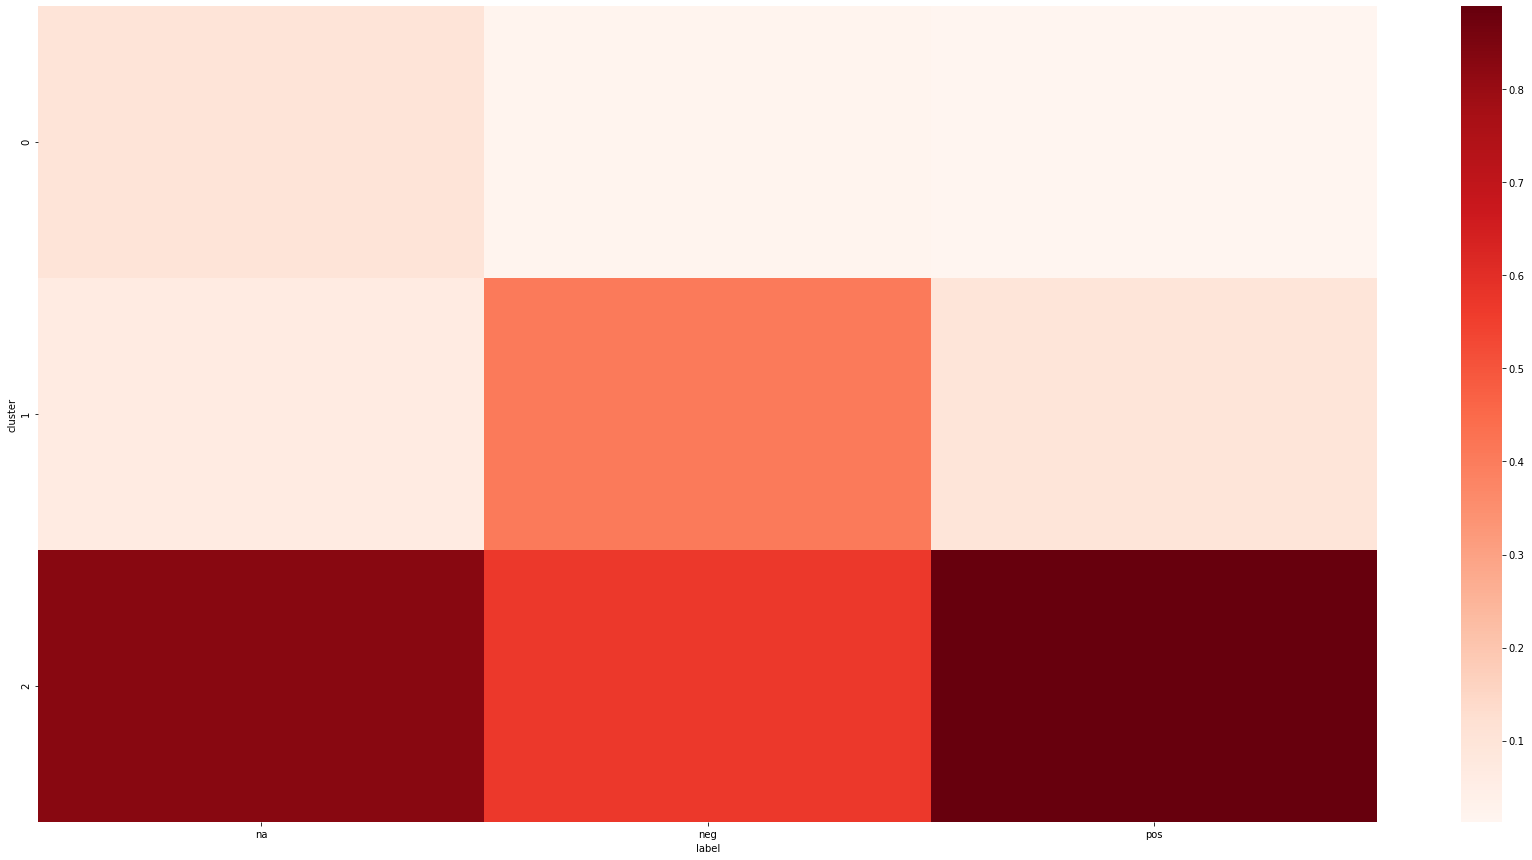

In [304]:
clusters = df.groupby(['cluster', 'label']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))

cluster_by_label = clusters.unstack(level = 'label')
cluster_by_label['na'] = cluster_by_label.na / sum(cluster_by_label.na)
cluster_by_label['pos'] = cluster_by_label.pos / sum(cluster_by_label.pos)
cluster_by_label['neg'] = cluster_by_label.neg / sum(cluster_by_label.neg)

plot = sns.heatmap(cluster_by_label, ax = ax2, cmap = 'Reds')

In [305]:
cluster_by_label

label,na,neg,pos
cluster,,,
0,0.104273,0.020833,0.012821
1,0.066380,0.409722,0.098291
2,0.829347,0.569444,0.888889
